# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm
(Dropbox will remain open until December 8 at 11:59pm)

### Name:

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [32]:
# column names

column_names = """
area A,
perimeter P,
compactness C = 4*pi*A/P^2,
length of kernel,
width of kernel,
asymmetry coefficient,
length of kernel groove,
Target
"""

In [33]:
cleaned_str = re.sub(r'^\d+\.\s*', '', column_names)  # Use column_names instead of str
cleaned_str = cleaned_str.strip()
# Strip leading/trailing spaces and split by commas to create a list of column names
column_names_list = [name.strip() for name in cleaned_str.split(',')]
display(column_names_list)

['area A',
 'perimeter P',
 'compactness C = 4*pi*A/P^2',
 'length of kernel',
 'width of kernel',
 'asymmetry coefficient',
 'length of kernel groove',
 'Target']

In [34]:
# TODO: Import dataset and inspect the first five columns
filename = "seeds_dataset.txt"

data = pd.read_csv(filename,
                   delimiter='\t',
                   names = column_names_list)

display(data.iloc[:, :5])


,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel
0,15.26,14.84,0.8710,5.763,3.312
1,14.88,14.57,0.8811,5.554,3.333
2,14.29,14.09,0.9050,5.291,3.337
3,13.84,13.94,0.8955,5.324,3.379
4,16.14,14.99,0.9034,5.658,3.562
...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981
206,11.23,12.88,0.8511,5.140,2.795
207,13.20,13.66,0.8883,5.236,3.232
208,11.84,13.21,0.8521,5.175,2.836


In [35]:
display(data)

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Next, you will need to separate the data into your feature matrix and target vector.

In [36]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)*

### Answer:
Scaling is required because PCA is sensitive to the variances / scales of the features of the data.  It is to ensure that the PCA results are not dominated by features with larger scales or variances.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [37]:
# TODO: Print the shape of the training feature matrix and target vector
display(X.shape)
display(y.shape)

(210, 7)

(210,)

In [38]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

Now that we have our training data, we can implement our selected scaler.

In [39]:
# TODO: Scale the data
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# Convert the scaled data back to a DataFrame (if needed)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

# Display the scaled DataFrame
print(scaled_X_train.head())

     area A  perimeter P  compactness C = 4*pi*A/P^2  length of kernel  \
0  0.332389     0.349174                    0.753176          0.293356   
1  0.799811     0.834711                    0.701452          0.854167   
2  0.000000     0.000000                    0.514519          0.000000   
3  0.337110     0.411157                    0.456443          0.427365   
4  0.058546     0.148760                    0.078040          0.213964   

   width of kernel  asymmetry coefficient  length of kernel groove  
0         0.478974               0.251583                 0.236829  
1         0.776194               0.192812                 0.809453  
2         0.111903               0.547387                 0.135401  
3         0.355666               0.299952                 0.323486  
4         0.040627               0.702636                 0.372230  


In [40]:
display(X_train.shape)
display(y_train.shape)

(157, 7)

(157,)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [41]:
# TODO: Instantiate model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [42]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [43]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(scaled_X_train, y_train)
print(f'Best grid estimator: {grid.best_estimator_ }')
print(f'Best grid parameters: {grid.best_params_}')
print(f'Cross-Validation accuracy {grid.best_score_:.7f}')
test_score = grid.score(scaled_X_test, y_test)
print(f'This is the test score {test_score:.7f}')


Best grid estimator: LogisticRegression(C=10.0, max_iter=1000)
Best grid parameters: {'C': 10.0, 'fit_intercept': True}
Cross-Validation accuracy 0.9429435
This is the test score 0.9245283


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [44]:
# TODO: Predict y labels using best estimator
y_pred_np = grid.best_estimator_.predict(scaled_X_test)
# y_pred = pd.DataFrame(y_pred_np, columns=["Target"])
# display(y_pred.head(10))
display(y_pred_np)

array([2, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3,
       1, 2, 3, 2, 2, 3, 2, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3,
       3, 3, 1, 1, 3, 1, 3, 3, 2])

In [45]:
# TODO: Reduce dimensions of test data for plotting
pca = PCA(n_components=2)
pca_X_test = pca.fit_transform(scaled_X_test)

pca_X_test.shape

(53, 2)

In [46]:
display(pca_X_test)

array([[ 0.4603279 , -0.14688701],
       [-0.57197419, -0.10866547],
       [ 0.21005094, -0.03420771],
       [ 0.39987348,  0.20246224],
       [ 0.96387654,  0.1187251 ],
       [-0.78055747,  0.35411712],
       [-0.04757626,  0.09200283],
       [-0.53850077, -0.15939811],
       [ 0.24092985, -0.1982011 ],
       [ 0.98180824,  0.01109443],
       [-0.56110646,  0.40609016],
       [ 1.00419362, -0.15076166],
       [-0.891942  , -0.28585859],
       [ 1.03504819, -0.36278099],
       [ 1.1759688 , -0.12815718],
       [-0.21086803, -0.14456377],
       [ 0.48707221, -0.22519026],
       [ 0.00698469,  0.44830723],
       [ 0.14372508,  0.37375006],
       [ 0.7854955 ,  0.05656324],
       [ 0.30662949,  0.05828162],
       [-0.35943144, -0.24391564],
       [ 0.02723769,  0.12859877],
       [ 0.88380798, -0.01017973],
       [-0.8674721 , -0.430683  ],
       [ 0.82603861,  0.04437564],
       [ 0.93610015, -0.01477695],
       [-0.43646325,  0.02392723],
       [ 0.95806965,

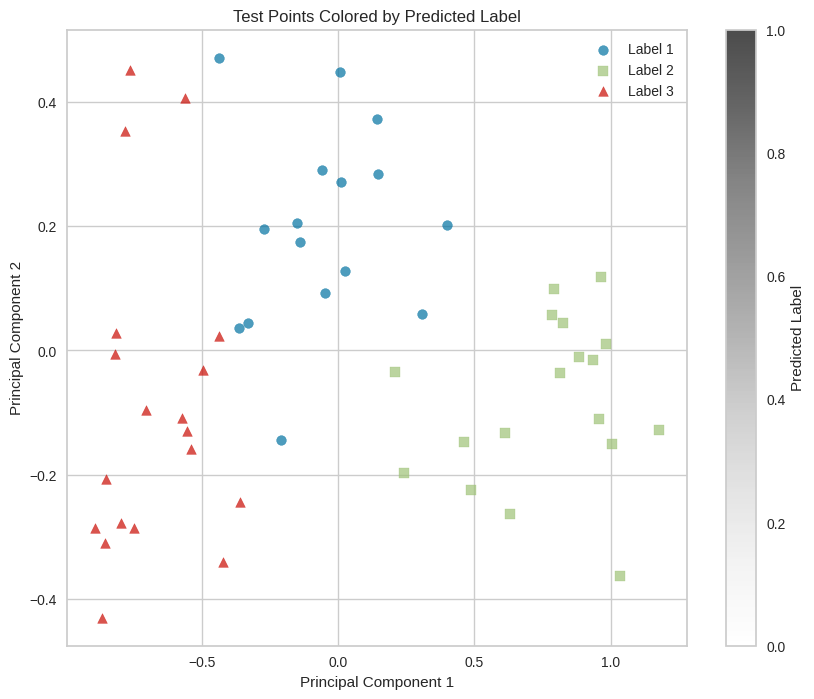

In [47]:
# TODO: Plot test points colored by predicted label
# Define markers for each class (optional)
markers = ['o', 's', '^', 'D', 'P']  # Add more markers if needed

# Create a scatter plot
plt.figure(figsize=(10, 8))
for i, label in enumerate(sorted(set(y_pred_np))):
    indices = (y_pred_np == label)
    plt.scatter(pca_X_test[indices, 0], pca_X_test[indices, 1], label=f'Label {label}', marker=markers[i % len(markers)], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Points Colored by Predicted Label')
plt.legend()
plt.colorbar(label='Predicted Label')
plt.grid(True)
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

#### Answers

1. Certainly, this model demonstrated strong performance with high scores in both training and testing datasets, showcasing balanced bias and variance.
1. The results are promising as the predicted labels exhibit clear grouping, suggesting potential linearity in the dataset, supported by the effective performance of both PCA and logistic regression techniques known for their linear characteristics.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. From peers, from notes, googling, gen AI.
1. Did them sequentially, as they appeared on the notebook.
1. Asked gen AI to explain the concepts like PCA, KMeans, and the various scores calculated. Asked for code to do plots and sample code for implementing the models.
1. Some of the directions were a little vague. Searching through the examples provided some help but overall it was alot of looking up concepts and samples online.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed).

In [48]:
# TODO: Scale feature matrix
data = pd.read_csv(filename,
                   delimiter='\t',
                   names = column_names_list)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

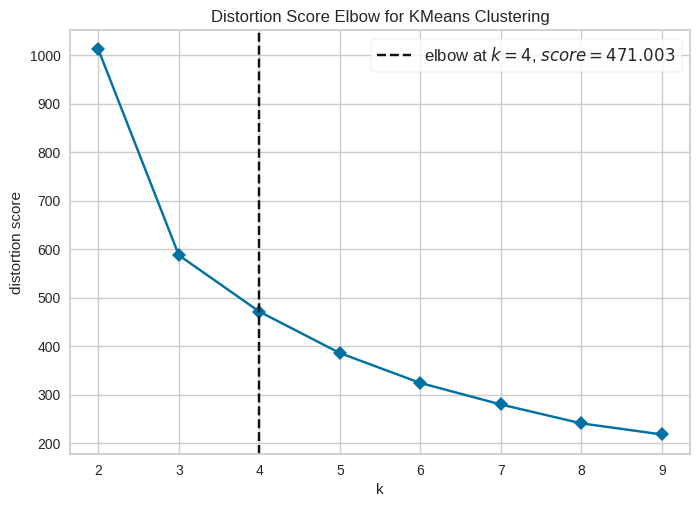

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans
ke = kelbow_visualizer(KMeans(random_state=0,
                              n_init=10),
                              X,
                              k=(2,10),
                              metric='distortion',timings=False)
# Fit the visualizer to the scaled data
ke.fit(X_scaled)
# Display the visualization
ke.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

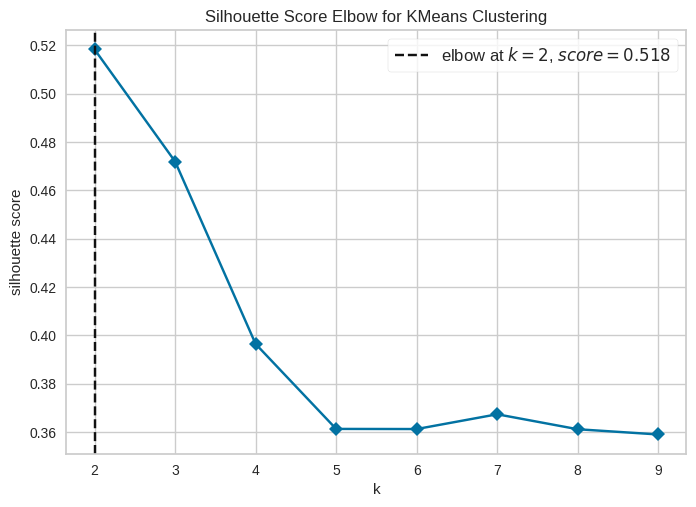

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
# Silhouette score
ke_silhouette = kelbow_visualizer(KMeans(random_state=0,
                                         n_init=10),
                                         X,
                                         k=(2, 10),
                                         metric='silhouette',
                                         timings=False)

ke_silhouette.fit(X_scaled)
ke_silhouette.show()

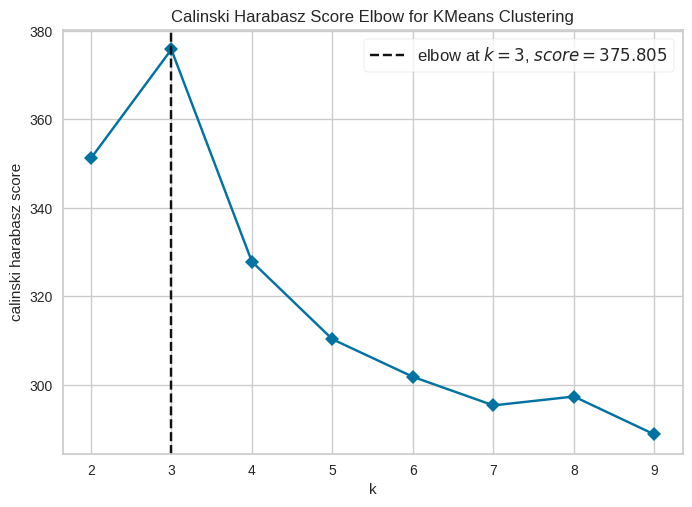

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [51]:
# Calinski-Harabasz Score

# Instantiate the KElbowVisualizer for Calinski-Harabasz score
ke_calinski = kelbow_visualizer(KMeans(random_state=0,
                                       n_init=10),
                                       X,
                                       k=(2, 10),
                                       metric='calinski_harabasz',
                                       timings=False)

ke_calinski.fit(X_scaled)
ke_calinski.show()

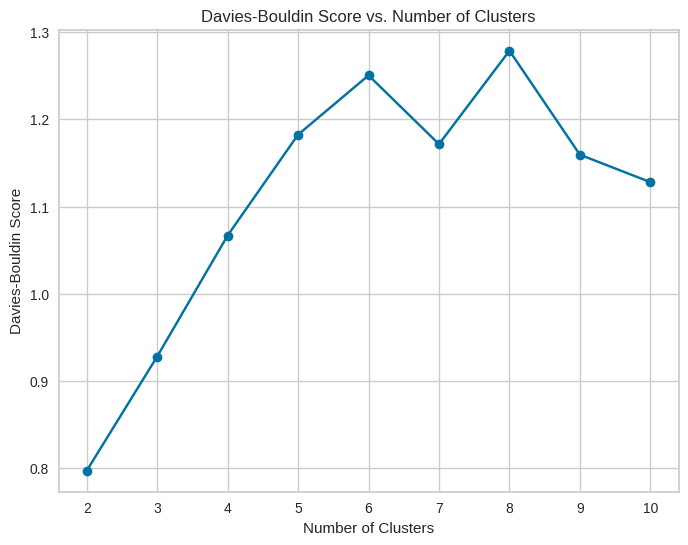

In [52]:
# Davies-Bouldin score
# Instantiate the KElbowVisualizer for Davies-Bouldin score
# ke_davies_bouldin = kelbow_visualizer(KMeans(random_state=0,
#                                              n_init=10),
#                                              X,
#                                              k=(2, 10),
#                                              metric='davies_bouldin',
#                                              timings=False)
#
# ke_davies_bouldin.fit(X_scaled)
# ke_davies_bouldin.show()

# Initialize an empty list to store Davies-Bouldin scores for different cluster counts
db_scores = []

# Define a range of clusters to evaluate
cluster_range = range(2, 11)  # Specify the range of cluster counts

# Compute Davies-Bouldin scores for different numbers of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.predict(X_scaled)
    db_score = davies_bouldin_score(X_scaled, cluster_labels)
    db_scores.append(db_score)

# Visualize Davies-Bouldin scores for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, db_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [53]:
# TODO: Implement K-means with the number of clusters determined in the previous step

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [54]:
# TODO: Calculate the three different validation metrics

labels = kmeans.labels_

# Silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.7841749161647
Davies-Bouldin Score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

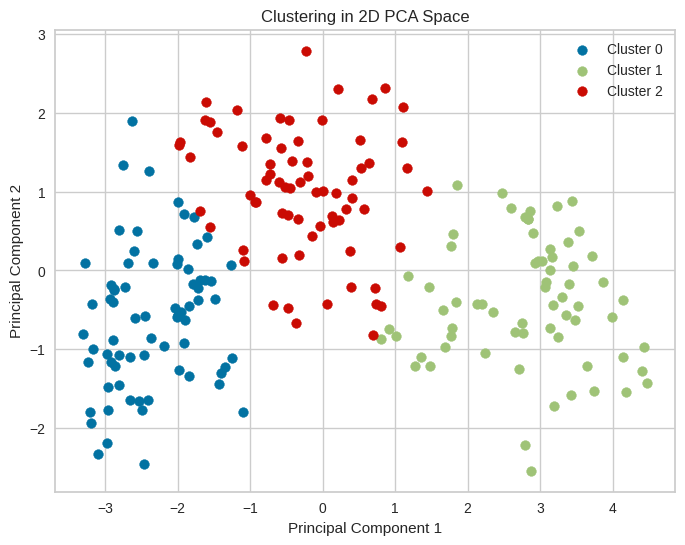

In [55]:
# TODO: Plot clustering results

# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X_scaled)

# # Visualize clusters using a 3D scatter plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot data points with different colors for each cluster
# for label in set(labels):
#     indices = labels == label
#     ax.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2], label=f'Cluster {label}')

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# ax.set_title('Clustering in 3D PCA Space')
# ax.legend()
# plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize clusters using a 2D scatter plot
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for label in set(labels):
    indices = labels == label
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Cluster {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering in 2D PCA Space')
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

Number of components explaining 95% variance: 3


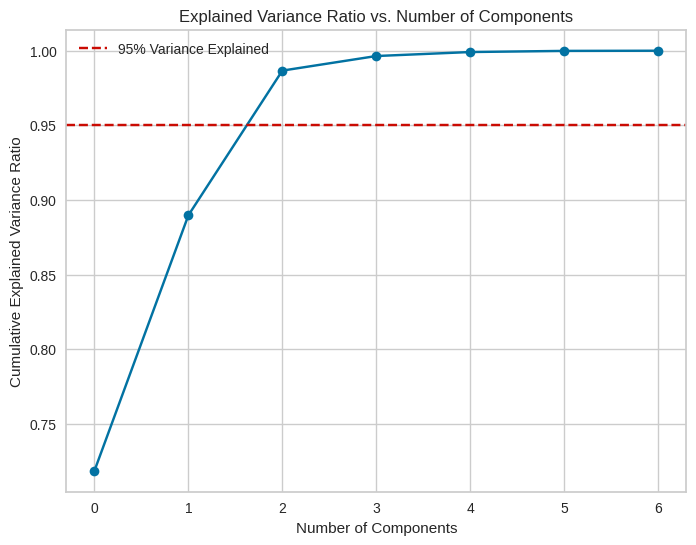

In [56]:
# TODO: Find the number of principal components using explained variance ratio

# Initialize PCA and fit to the scaled data
pca = PCA().fit(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components explaining desired variance (e.g., 95%)
n_components_desired_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # +1 for zero-based indexing

print(f"Number of components explaining 95% variance: {n_components_desired_variance}")

# Plot the explained variance ratio to visualize the variance explained by each component
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [57]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
display(explained_variance_ratio)

array([0.71874303, 0.17108184])

In [58]:
# TODO: Implement K-means with the transformed data

kmeans = KMeans(n_clusters=3, random_state=0)

# fit KMeans to the transformed data
kmeans.fit(X_pca)

# obtain cluster labels for the data points
cluster_labels = kmeans.labels_

# access cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# access the inertia (sum of squared distances of samples to their closest cluster center)
inertia = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
# TODO: Calculate the three different validation metrics

silhouette = silhouette_score(X_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.4928434916240086
Calinski-Harabasz Index: 397.00858946651357
Davies-Bouldin Index: 0.7083801812756491


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [60]:
# TODO: Display results
metrics_data = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
    'Value': [silhouette, calinski_harabasz, davies_bouldin]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

                    Metric       Value
0         Silhouette Score    0.492843
1  Calinski-Harabasz Index  397.008589
2     Davies-Bouldin Index    0.708380


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


#### Answers

1. Given the original dataset's three class labels, it's logical that the ideal cluster count was 3.
1. Indeed, the plots showcase comparable distributions across the three classes.
1. Two components were utilized to account for at least 95% of the variance. Affirmatively, employing PCA enhanced my outcomes. Typically, reducing the feature count enhances clustering accuracy due to the curse of dimensionality.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

### Answers:

1. From peers, from notes, googling, gen AI.
1. Did them sequentially, as they appeared on the notebook.
1. Asked gen AI to explain the concepts like PCA, KMeans, and the various scores calculated. Asked for code to do plots and sample code for implementing the models.
1. Some of the directions were a little vague. Searching through the examples provided some help but overall it was alot of looking up concepts and samples online.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


#### Answers:

1. I liked the visualization part of the assignment. I liked seeing examples of how the concepts relate to the models.
1. I disliked some of the guesswork related to implementing the models via code as I found it a little difficult to determine what I need to do.